In [1]:
################################################## working working working WORKINGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG 
############## OMG AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA MAZZE HO GAYE BC WOW AAAO MAZZE HO GAYE AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


import cv2
import numpy as np

# Open the video file
cap = cv2.VideoCapture(path)

# Define the rectangular window where the contours will be detected
x, y, w, h = 340, 330, 50, 70

# Create a window to display the video and the centroid
cv2.namedWindow('Window')
cxlist = []
cylist = []
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break
    
    # Crop the frame to the rectangular window
    window = frame[y:y+h, x:x+w]
    
    # Convert the window to grayscale
    gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary image
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # If there are any contours found
    if len(contours) > 0:
        # Calculate the combined centroid of all the contours
        cx = 0
        cy = 0
        total_area = 0
        for contour in contours:
            
            area = cv2.contourArea(contour)
            M = cv2.moments(contour)
            if M['m00'] !=0:
                cx += int(M['m10']/M['m00']) * area
                cy += int(M['m01']/M['m00']) * area
            total_area += area
            
        cx = int(cx/total_area)
        cy = int(cy/total_area)
        cxlist.append(cx)
        cylist.append(cy)
        
        # Draw a small circle at the centroid position
        cv2.circle(window, (cx, cy), 3, (0, 255, 0), -1)
        cv2.drawContours(window, contours,-1, (0, 0, 255), -1)
        
        
    # Display the window with the video and the centroid
    cv2.imshow('Window', frame)
    cv2.imshow("Designated window",window)
    
    # Exit if the user presses the 'q' key
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()


counter = 0 
        

        # Initialize a variable to keep track of the minimum value seen so far
min_value = None

# Get the first reading from the sensor
readings = cylist

for i in range(1, len(readings)):
    # Get the current and previous readings
    current_reading = readings[i]
    previous_reading = readings[i-1]

    # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
    if current_reading < previous_reading and (min_value is None or current_reading < min_value):
        min_value = current_reading

    # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
    elif min_value is not None:
        counter += 1
        min_value = None

        
        
print(counter//2 + 1)

plt.plot(cylist)

NameError: name 'path' is not defined

the final counter reading from the ankles is : 6
the final counter reading from the rope in left hand is : 6
the final counter reading from the rope in right hand is : 12
rope maxima indices for roi1 are as follows: [3, 17, 32, 36, 45, 50]
rope maxima indices for roi2 are as follows: [7, 9, 14, 20, 27, 30, 34, 37, 40, 44, 46, 53]
ankle minima indices are as follows: [4, 18, 32, 40, 45, 47]


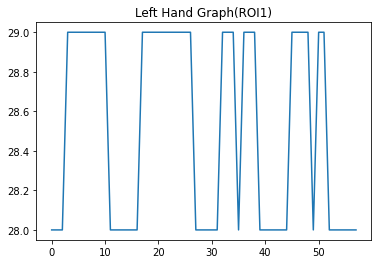

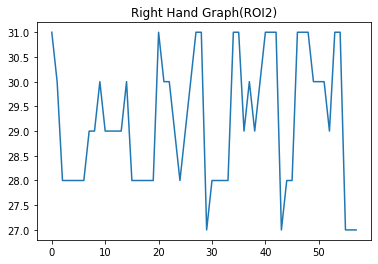

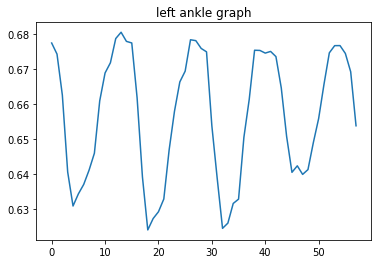

In [2]:
'''
tracking the wrist and have them in a frame
get to see the difference image formed within these windows

'''

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"


## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2
import time
import random
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []


cxlist_roi1 = []
cylist_roi1 = []
cxlist_roi2 = []
cylist_roi2 = []


cap = cv2.VideoCapture(path1)

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            left_heel_y.append(landmarks[29].y)
            right_heel_y.append(landmarks[30].y)
            left_foot_y.append(landmarks[31].y)
            right_foot_y.append(landmarks[32].y)
            
        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

    ###obtaining the right and left hand positions and subsequently marking them on the video feed.
    
        right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
        left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]
        
    
        
        
        # If left wrist landmark is detected, draw the bounding rectangle around it
        if left_wrist.visibility > 0:
            left_wrist_x = int(left_wrist.x * frame.shape[1])
            left_wrist_y = int(left_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (left_wrist_x - 30, left_wrist_y - 30),
                          (left_wrist_x + 40, left_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi1 = frame[left_wrist_y - 30:left_wrist_y + 30, left_wrist_x - 30:left_wrist_x + 40]
            except : 
                roi1 = frame[200:280,200:280]


            ##If right wrist landmark is detected, draw the bounding rectangle around it
        if right_wrist.visibility > 0:
            right_wrist_x = int(right_wrist.x * frame.shape[1])
            right_wrist_y = int(right_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (right_wrist_x - 40, right_wrist_y - 30),
                          (right_wrist_x + 30 , right_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi2 = frame[right_wrist_y - 30:right_wrist_y + 30, right_wrist_x - 30:right_wrist_x + 30]
            except: 
                roi2 = frame[200:280,200:280]

       
    ##### counter logic for finding the minimas at the ankles 
    
        ankle_counter = 0 
        
        ankle_minima_indice = []
        # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = left_ankle_y

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                ankle_counter += 1
                min_value = None
                ankle_minima_indice.append(i-1)
                
    
        ### start of the section of rope detection of the roi1
        #converting the desired window to grayscale
        gray = cv2.cvtColor(roi1,cv2.COLOR_BGR2GRAY)
        
        # applying threshold to binary image 
        ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
        
        #contours and hierarchy
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        
        
        # If there are any contours found
        if len(contours) > 0:
            # Calculate the combined centroid of all the contours
            cx_roi1 = 0
            cy_roi1 = 0
            total_area = 0
            for contour in contours:

                area = cv2.contourArea(contour)
                
                M = cv2.moments(contour)
                if M['m00'] !=0:
                    cx_roi1 += int(M['m10']/M['m00']) * area
                    cy_roi1 += int(M['m01']/M['m00']) * area
                total_area += area

            cx_roi1 = int(cx_roi1/total_area)
            cy_roi1 = int(cy_roi1/total_area)
            cxlist_roi1.append(cx_roi1)
            cylist_roi1.append(cy_roi1)
            
            # Draw a small circle at the centroid position
            cv2.circle(roi1, (cx_roi1, cy_roi1), 3, (0, 255, 0), -1)
            cv2.drawContours(roi1, contours,-1, (0, 0, 255), -1)

            
        ### start of the section of rope detection of the roi2
        #converting the desired window to grayscale
        gray1 = cv2.cvtColor(roi2,cv2.COLOR_BGR2GRAY)
        
        # applying threshold to binary image 
        ret1, thresh1 = cv2.threshold(gray1,127,255,cv2.THRESH_BINARY)
        
        #contours and hierarchy
        contours1, hierarchy1 = cv2.findContours(thresh1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        
        # If there are any contours found
        if len(contours1) > 0:
            # Calculate the combined centroid of all the contours
            cx_roi2 = 0
            cy_roi2 = 0
            total_area_2 = 0
            for contour in contours1:

                area = cv2.contourArea(contour)
                M = cv2.moments(contour)
                if M['m00'] !=0:
                    cx_roi2 += int(M['m10']/M['m00']) * area
                    cy_roi2 += int(M['m01']/M['m00']) * area
                total_area_2 += area

            cx_roi2 = int(cx_roi2/total_area_2)
            cy_roi2 = int(cy_roi2/total_area_2)
            cxlist_roi2.append(cx_roi2)
            cylist_roi2.append(cy_roi2)
            
            # Draw a small circle at the centroid position
            cv2.circle(roi2, (cx_roi2, cy_roi2), 3, (0, 255, 0), -1)
            cv2.drawContours(roi2, contours1,-1, (0, 0, 255), -1)

        
        ##### counter logic for looking at the number of jumps produced by looking at the hands
         # Initialize a counter to keep track of the number of local maximas encountered
        rope_counter_roi2 = 0 

        # Initialize a variable to keep track of the maximum value seen so far
        max_value = None

        # Get the first reading from the sensor
        readings = cylist_roi2
        
        # get the indices of maximas and when they're encountered
        rope_maxima_roi2_indices = []
        

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is greater than the previous reading and greater than the maximum value seen so far, update the maximum value
            if current_reading > previous_reading and (max_value is None or current_reading > max_value):
                max_value = current_reading

            # If the current reading is less than or equal to the previous reading and the maximum value has been updated, increment the counter and reset the maximum value
            elif max_value is not None:
                rope_counter_roi2 += 1
                max_value = None
                rope_maxima_roi2_indices.append(i - 1)
        
        
        
        
        
        # Initialize a counter to keep track of the number of local maximas encountered
        rope_counter_roi1 = 0 

        # Initialize a variable to keep track of the maximum value seen so far
        max_value = None

        # Get the first reading from the sensor
        readings = cylist_roi1
        
        # get the indices of maximas and when they're encountered
        rope_maxima_roi1_indices = []
        

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is greater than the previous reading and greater than the maximum value seen so far, update the maximum value
            if current_reading > previous_reading and (max_value is None or current_reading > max_value):
                max_value = current_reading

            # If the current reading is less than or equal to the previous reading and the maximum value has been updated, increment the counter and reset the maximum value
            elif max_value is not None:
                rope_counter_roi1 += 1
                max_value = None
                rope_maxima_roi1_indices.append(i - 1)
        
        
        cv2.imshow('Mediapipe Feed', image)
        cv2.imshow("LeftWristCam", roi1)
        cv2.imshow("RightWristCam",roi2)
        
        
        
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break
                
        if ret ==False:
            break
        
    print(f"the final counter reading from the ankles is : {ankle_counter}") 
    print(f"the final counter reading from the rope in left hand is : {rope_counter_roi1}")
    print(f"the final counter reading from the rope in right hand is : {rope_counter_roi2}")
    print(f"rope maxima indices for roi1 are as follows: {rope_maxima_roi1_indices}")
    print(f"rope maxima indices for roi2 are as follows: {rope_maxima_roi2_indices}")
    print(f"ankle minima indices are as follows: {ankle_minima_indice}")
    cap.release()
    cv2.destroyAllWindows()
    
    
plt.plot(cylist_roi1)
plt.title("Left Hand Graph(ROI1)")
plt.show()

plt.plot(cylist_roi2)
plt.title("Right Hand Graph(ROI2)")
plt.show()


plt.plot(left_ankle_y)
plt.title("left ankle graph")
plt.show()




